In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

data = xr.open_dataset(r"D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", drop_variables=["time_bnds"])
#drop_variables除去多余的变量
data

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 519)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

In [ ]:
!pip install visualpython --upgrade

In [ ]:
!visualpy install

In [2]:
f = data
print(f.dims)#维数
print('-----------------')
print(f.coords)#坐标
print('-----------------')
print(f.attrs)#资料详细来源

Frozen({'level': 17, 'lat': 73, 'lon': 144, 'time': 519})
-----------------
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
-----------------
{'Conventions': 'CF-1.0', 'title': 'Monthly NCEP/DOE Reanalysis 2', 'comments': 'Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)\n(4x/day).  It consists of most variables interpolated to\npressure surfaces from model (sigma) surfaces.', 'platform': 'Model', 'source': 'NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model', 'institution': 'National Centers for Environmental Prediction', 'dataset_title': 'NCEP-DOE AMIP-II Reanalysis', 'References': 'https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html', 'source_url': 'http://www.cpc.ncep.noaa.gov/products/wesley/rean

In [3]:
help(f)

Help on Dataset in module xarray.core.dataset object:

class Dataset(xarray.core.common.DataWithCoords, xarray.core.arithmetic.DatasetArithmetic, collections.abc.Mapping, typing.Generic)
 |  Dataset(data_vars: Mapping[Any, Any] = None, coords: Mapping[Any, Any] = None, attrs: Mapping[Any, Any] = None)
 |  
 |  A multi-dimensional, in memory, array database.
 |  
 |  A dataset resembles an in-memory representation of a NetCDF file,
 |  and consists of variables, coordinates and attributes which
 |  together form a self describing dataset.
 |  
 |  Dataset implements the mapping interface with keys given by variable
 |  names and values given by DataArray objects for each variable name.
 |  
 |  One dimensional variables with name equal to their dimension are
 |  index coordinates used for label based indexing.
 |  
 |  To load data from a file or file-like object, use the `open_dataset`
 |  function.
 |  
 |  Parameters
 |  ----------
 |  data_vars : dict-like, optional
 |      A mappin

In [4]:
import datetime as dt  #处理datetime64格式数据使用，可以解析时间格式

f.hgt.time  #查看f.sst.time

<xarray.DataArray 'time' (time: 519)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2022-01-01T00:00:00.000000000',
       '2022-02-01T00:00:00.000000000', '2022-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    prev_avg_period:     0000-00-01 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    bounds:              time_bnds
    actual_range:        [1569072. 1947432.]

In [5]:
f.hgt.time.dt.year  #将f.hgt.time解析为月份

<xarray.DataArray 'year' (time: 519)>
array([1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979,
       1979, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       1980, 1980, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       1981, 1981, 1981, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982,
       1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
       1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986,
       1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987,
       1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1988, 1988,
       1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1989,
       1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997,
...
       2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022,
       2022, 2022], dtype=int64)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01

In [6]:
f.hgt

<xarray.DataArray 'hgt' (time: 519, level: 17, lat: 73, lon: 144)>
[92747376 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

## 计算1991-2020年（30年）1月500hPa的平均位势高度场（即气候态），绘制环流平均图；

In [7]:
# 索引1991-2020年之间1月的数据 500hPa
z = f.hgt.loc[f.time.dt.month.isin([1])].loc['1991-01-01':'2020-02-01', 500]
z

<xarray.DataArray 'hgt' (time: 30, lat: 73, lon: 144)>
[315360 values with dtype=float32]
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1991-01-01 1992-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [8]:
z.shape

(30, 73, 144)

In [9]:
ave_hgt = np.array(z).reshape(30, 73, 144).mean(0)  #求平均位势高度场（即气候态）
ave_hgt

array([[5058.033 , 5058.033 , 5058.033 , ..., 5058.033 , 5058.033 ,
        5058.033 ],
       [5058.7334, 5059.    , 5059.3   , ..., 5057.9   , 5058.2   ,
        5058.467 ],
       [5066.8667, 5067.467 , 5068.033 , ..., 5065.2666, 5065.8667,
        5066.3667],
       ...,
       [5126.533 , 5127.4   , 5128.433 , ..., 5123.7   , 5124.6665,
        5125.6   ],
       [5124.2334, 5124.567 , 5124.967 , ..., 5123.    , 5123.4   ,
        5123.7   ],
       [5122.433 , 5122.433 , 5122.433 , ..., 5122.433 , 5122.433 ,
        5122.433 ]], dtype=float32)

In [10]:
ave_hgt.shape  #维数

(73, 144)

## 简单绘图

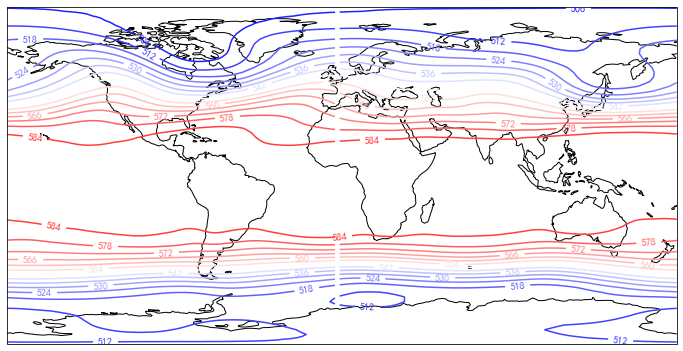

In [14]:


lon = f.lon
lat = f.lat


# 生成画布
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()  #绘制海岸线
# 绘制等值线图
contour = ax.contour(lon, lat,ave_hgt/10.0,levels=np.arange(500,600,6),linewidths=1.5,cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
proj = ccrs.PlateCarree(central_longitude=180)
#ax.set_title('1991-2020年平均1月500hPa位势高度')  #设置标签

ax.clabel(contour)
plt.show()

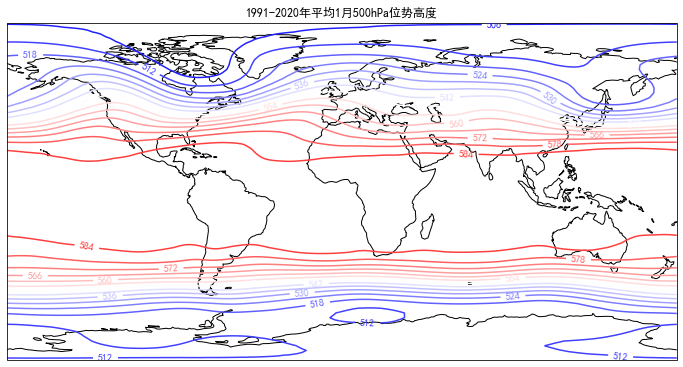

In [15]:
from cartopy.util import add_cyclic_point  #循环
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
lon = f.lon
lat = f.lat
chgt, cycle_lon = add_cyclic_point(ave_hgt, coord=lon)
LON, LAT = np.meshgrid(cycle_lon, lat)

# 生成画布
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()  #绘制海岸线
# 绘制等值线图
contour = ax.contour(LON, LAT, chgt/10.0,levels=np.arange(500,600,6),linewidths=1.5,cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
proj = ccrs.PlateCarree(central_longitude=180)
ax.set_title('1991-2020年平均1月500hPa位势高度')  #设置标签

ax.clabel(contour)
plt.show()

## 绘制绘制环流平均图

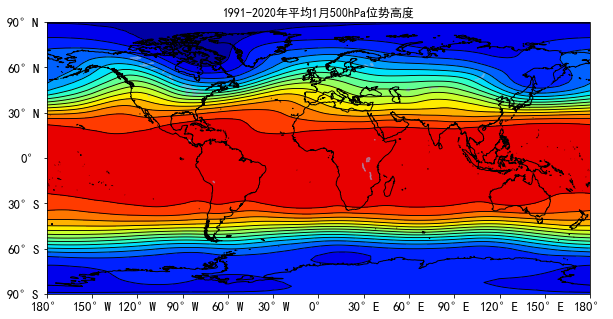

In [17]:
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import matplotlib
import cartopy.mpl.ticker as cticker  #刻度
#防止中文出错
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
#matplotlib.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False
#除去0和360处空白
chgt, cycle_lon = add_cyclic_point(ave_hgt, coord=lon)
LON, LAT = np.meshgrid(cycle_lon, lat)


def contour_map(fig, img_extent, spec):
    fig.set_extent(img_extent, crs=ccrs.PlateCarree())
    fig.add_feature(cfeature.COASTLINE.with_scale('50m'))  #添加海岸线
    fig.add_feature(cfeature.LAKES, alpha=0.5)  #添加湖泊
    fig.set_xticks(np.arange(leftlon, rightlon + spec, spec), crs=ccrs.PlateCarree())
    fig.set_yticks(np.arange(lowerlat, upperlat + spec, spec), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig.xaxis.set_major_formatter(lon_formatter)
    fig.yaxis.set_major_formatter(lat_formatter)


leftlon, rightlon, lowerlat, upperlat = (-180, 180, -90, 90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]  #经纬度范围

# 生成画布
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制等值线图
contour = ax.contourf(LON, LAT, chgt/10.0,levels=np.arange(500,600,6),linewidths=0.90,cmap='jet',transform=ccrs.PlateCarree())
contour1 = ax.contour(LON, LAT, chgt/10.,colors='black',levels=np.arange(500,600,6),linewidths=0.9)
contour_map(ax, img_extent, 30)
#ax.clabel(contour)  #添加等值线的值
ax.set_title('1991-2020年平均1月500hPa位势高度')  #设置标签
plt.xticks(fontsize=13)#设置标签大小
plt.yticks(fontsize=13)

#plt.colorbar(contour)#色标
#plt.savefig('D:\data\DQXHYC\sx01\图1.jpg')
plt.show()

## 计算2008年1月500hPa位势高度距平（即相对于气候态的偏差），绘制环流距平图；


In [18]:
z2008 = f.hgt.loc[f.time.dt.month.isin([1])].loc['2008-01-01', 500]
z2008

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[4956., 4956., 4956., ..., 4956., 4956., 4956.],
       [4989., 4989., 4989., ..., 4988., 4989., 4989.],
       [5029., 5030., 5030., ..., 5027., 5028., 5028.],
       ...,
       [5058., 5058., 5057., ..., 5060., 5060., 5059.],
       [5055., 5054., 5054., ..., 5057., 5056., 5056.],
       [5067., 5067., 5067., ..., 5067., 5067., 5067.]], dtype=float32)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2008-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [19]:
dep=z2008-ave_hgt#求距平
dep

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[-102.0332  , -102.0332  , -102.0332  , ..., -102.0332  ,
        -102.0332  , -102.0332  ],
       [ -69.7334  ,  -70.      ,  -70.299805, ...,  -69.8999  ,
         -69.200195,  -69.4668  ],
       [ -37.8667  ,  -37.466797,  -38.033203, ...,  -38.2666  ,
         -37.8667  ,  -38.3667  ],
       ...,
       [ -68.5332  ,  -69.3999  ,  -71.433105, ...,  -63.700195,
         -64.666504,  -66.6001  ],
       [ -69.2334  ,  -70.566895,  -70.9668  , ...,  -66.      ,
         -67.3999  ,  -67.700195],
       [ -55.433105,  -55.433105,  -55.433105, ...,  -55.433105,
         -55.433105,  -55.433105]], dtype=float32)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2008-01-01

## 绘制环流距平图

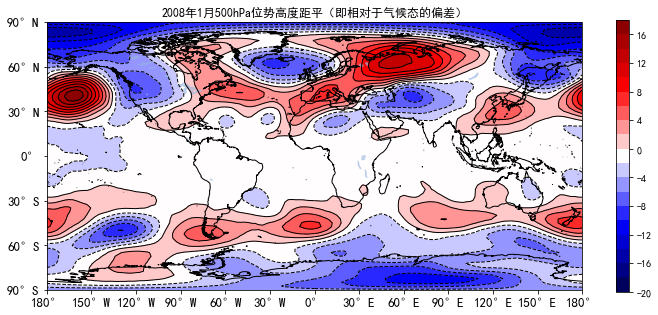

In [21]:
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker  #刻度

#除去0和360处空白
cdep, cycle_lon = add_cyclic_point(dep, coord=lon)
LON, LAT = np.meshgrid(cycle_lon, lat)


def contour_map(fig, img_extent, spec):
    fig.set_extent(img_extent, crs=ccrs.PlateCarree())
    fig.add_feature(cfeature.COASTLINE.with_scale('50m'))  #添加海岸线
    fig.add_feature(cfeature.LAKES, alpha=0.5)  #添加湖泊
    fig.set_xticks(np.arange(leftlon, rightlon + spec, spec), crs=ccrs.PlateCarree())
    fig.set_yticks(np.arange(lowerlat, upperlat + spec, spec), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig.xaxis.set_major_formatter(lon_formatter)
    fig.yaxis.set_major_formatter(lat_formatter)


leftlon, rightlon, lowerlat, upperlat = (-180, 180, -90, 90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]  #经纬度范围

# 生成画布
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制等值线图
contour = ax.contourf(LON, LAT, cdep/10.0,levels=np.arange(-20,20,2),cmap='seismic', transform=ccrs.PlateCarree())
contour1 = ax.contour(LON, LAT, cdep/10.,colors='black',levels=np.arange(-20,20,2),linewidths=1.0)
contour_map(ax, img_extent, 30)
#ax.clabel(contour)  #添加等值线的值
ax.set_title('2008年1月500hPa位势高度距平（即相对于气候态的偏差）')  #设置标签
plt.xticks(fontsize=13)#设置标签大小
plt.yticks(fontsize=13)

plt.colorbar(contour)#色标
#plt.savefig("D:\data\short_term_climate_class\sx01\图2.jpg")
plt.show()

## 计算2008年1月500hPa位势高度纬偏值（即相对于2008年1月500hPa位势高度纬向平均值的偏差），绘制环流纬偏图。

In [22]:
z2008

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[4956., 4956., 4956., ..., 4956., 4956., 4956.],
       [4989., 4989., 4989., ..., 4988., 4989., 4989.],
       [5029., 5030., 5030., ..., 5027., 5028., 5028.],
       ...,
       [5058., 5058., 5057., ..., 5060., 5060., 5059.],
       [5055., 5054., 5054., ..., 5057., 5056., 5056.],
       [5067., 5067., 5067., ..., 5067., 5067., 5067.]], dtype=float32)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2008-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [23]:
ave_lon = np.array(z2008).reshape(73,144).mean(1)  #纬圈平均值
ave_lon.shape

(73,)

In [24]:
(z2008).shape

(73, 144)

In [25]:
ave_lons=np.array([ave_lon]*144)
ave_lons.shape

(144, 73)

In [26]:
ave_lons=np.array([ave_lon]*144).T

ave_lons.shape#转置矩阵，使其维度与z2008相同

(73, 144)

In [27]:
wp=z2008-ave_lons#求纬偏
wp

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 26.861328,  26.861328,  26.861328, ...,  25.861328,  26.861328,
         26.861328],
       [ 49.73633 ,  50.73633 ,  50.73633 , ...,  47.73633 ,  48.73633 ,
         48.73633 ],
       ...,
       [ -9.5     ,  -9.5     , -10.5     , ...,  -7.5     ,  -7.5     ,
         -8.5     ],
       [-11.770996, -12.770996, -12.770996, ...,  -9.770996, -10.770996,
        -10.770996],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2008-01-01

## 绘制环流纬偏图

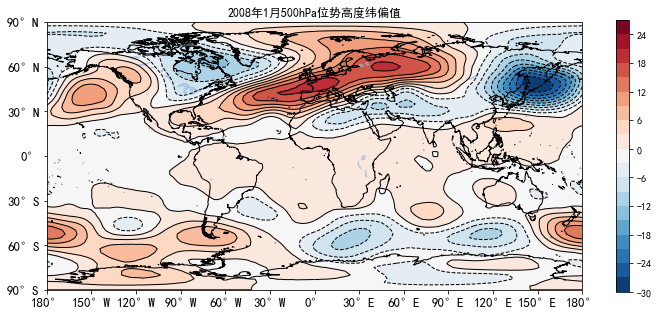

In [28]:
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker  #刻度

#除去0和360处空白
cwp, cycle_lon = add_cyclic_point(wp, coord=lon)
LON, LAT = np.meshgrid(cycle_lon, lat)


def contour_map(fig, img_extent, spec):
    fig.set_extent(img_extent, crs=ccrs.PlateCarree())
    fig.add_feature(cfeature.COASTLINE.with_scale('50m'))  #添加海岸线
    fig.add_feature(cfeature.LAKES, alpha=0.5)  #添加湖泊
    fig.set_xticks(np.arange(leftlon, rightlon + spec, spec), crs=ccrs.PlateCarree())
    fig.set_yticks(np.arange(lowerlat, upperlat + spec, spec), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig.xaxis.set_major_formatter(lon_formatter)
    fig.yaxis.set_major_formatter(lat_formatter)


leftlon, rightlon, lowerlat, upperlat = (-180, 180, -90, 90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]  #经纬度范围

# 生成画布
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制等值线图
contour = ax.contourf(LON, LAT, cwp/10.0,levels=np.arange(-30,30,3),linewidths=1.0,cmap='RdBu_r', transform=ccrs.PlateCarree())
contour1 = ax.contour(LON, LAT, cwp/10.,colors='black',levels=np.arange(-30,30,3),linewidths=1.0)
contour_map(ax, img_extent, 30)
#ax.clabel(contour)  #添加等值线的值
ax.set_title('2008年1月500hPa位势高度纬偏值')  #设置标签
plt.xticks(fontsize=13)#设置标签大小
plt.yticks(fontsize=13)

plt.colorbar(contour)#色标
#position = fig.add_axes([0.91, 0.28, 0.02, 0.45])  # 坐标＋长宽
#cbar = fig.colorbar(contour, cax=position, orientation='vertical')  # 水平horizontal
#plt.savefig('D:\data\short_term_climate_class\sx01\图3.jpg')

plt.show()

#  

# 完整代码

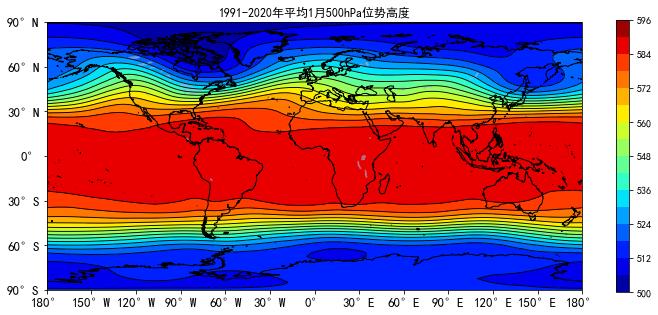

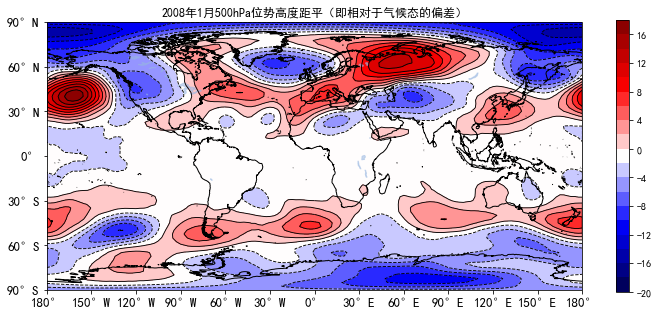

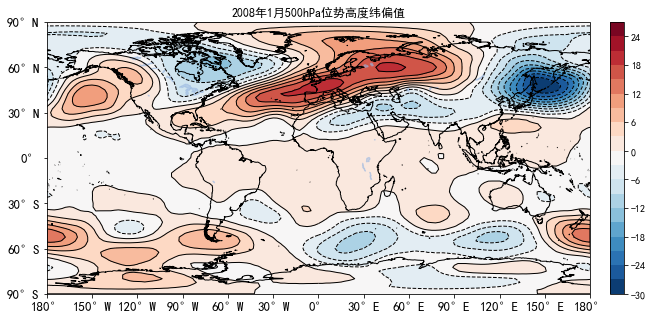

In [2]:
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker  # 刻度
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib

# 防止中文出错
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# matplotlib.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

f = xr.open_dataset(r"D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", drop_variables=["time_bnds"])
lon = f.lon
lat = f.lat

# 索引1991-2020年之间1月的数据 500hPa
z = f.hgt.loc[f.time.dt.month.isin([1])].loc['1991-01-01':'2020-02-01', 500]
# 索引2008年1月的数据 500hPa
z2008 = f.hgt.loc[f.time.dt.month.isin([1])].loc['2008-01-01', 500]

# 求平均位势高度场（即气候态）
ave_hgt = np.array(z).reshape(30, 73, 144).mean(0)

# 求距平
dep = z2008 - ave_hgt  # dep 距平

# 求纬偏
ave_lon = np.array(z2008).reshape(73, 144).mean(1)  # 纬圈平均值
ave_lons = np.array([ave_lon] * 144).T  # 转置矩阵，使其维度与z2008相同
wp = z2008 - ave_lons  # wp 纬偏值

# 经纬度范围
leftlon, rightlon, lowerlat, upperlat = (-180, 180, -90, 90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]


# 底图
def contour_map(fig, img_extent, spec):  # 画布，经纬度范围，步长
    fig.set_extent(img_extent, crs=ccrs.PlateCarree())
    fig.add_feature(cfeature.COASTLINE.with_scale('50m'))  # 添加海岸线
    fig.add_feature(cfeature.LAKES, alpha=0.5)  # 添加湖泊
    # 添加经纬度
    fig.set_xticks(np.arange(leftlon, rightlon + spec, spec), crs=ccrs.PlateCarree())
    fig.set_yticks(np.arange(lowerlat, upperlat + spec, spec), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig.xaxis.set_major_formatter(lon_formatter)
    fig.yaxis.set_major_formatter(lat_formatter)


# 绘制1991-2020年平均1月500hPa位势高度图
# 除去0和360处空白(使用循环)
chgt, cycle_lon = add_cyclic_point(ave_hgt, coord=lon)
LON1, LAT1 = np.meshgrid(cycle_lon, lat)

# 生成画布
fig1 = plt.figure(figsize=(12, 5))
ax1 = fig1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制等值线图
c1 = ax1.contourf(LON1, LAT1, chgt / 10.0, levels=np.arange(500, 600, 6), cmap='jet', transform=ccrs.PlateCarree())
c11 = ax1.contour(LON1, LAT1, chgt / 10., colors='black', levels=np.arange(500, 600, 6), linewidths=0.9)
contour_map(ax1, img_extent, 30)
# ax.clabel(contour)  #添加等值线的值
ax1.set_title('1991-2020年平均1月500hPa位势高度')  # 设置标签
plt.xticks(fontsize=13)  # 设置标签大小
plt.yticks(fontsize=13)
plt.colorbar(c1)  # 色标
plt.savefig('D:\data\short_term_climate_class\sx01\图1.jpg',dpi=300,bbox_inches='tight')  # 存图

# 绘制2008年1月500hPa位势高度距平图
# 除去0和360处空白
cdep, cycle_lon = add_cyclic_point(dep, coord=lon)
LON2, LAT2 = np.meshgrid(cycle_lon, lat)

# 生成画布
fig2 = plt.figure(figsize=(12, 5))
ax2 = fig2.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制等值线图
c2 = ax2.contourf(LON2, LAT2, cdep / 10.0, levels=np.arange(-20, 20, 2), cmap='seismic', transform=ccrs.PlateCarree())
c21 = ax2.contour(LON2, LAT2, cdep / 10., colors='black', levels=np.arange(-20, 20, 2), linewidths=0.9)
contour_map(ax2, img_extent, 30)
# ax.clabel(contour)  #添加等值线的值
ax2.set_title('2008年1月500hPa位势高度距平（即相对于气候态的偏差）')  # 设置标签
plt.xticks(fontsize=13)  # 设置标签大小
plt.yticks(fontsize=13)

plt.colorbar(c2)  # 色标
plt.savefig('D:\data\short_term_climate_class\sx01\图2.jpg',dpi=300,bbox_inches='tight')  # 存图

# 绘制2008年1月500hPa位势高度纬偏值图
# 除去0和360处空白
cwp, cycle_lon = add_cyclic_point(wp, coord=lon)
LON3, LAT3 = np.meshgrid(cycle_lon, lat)

# 生成画布
fig3 = plt.figure(figsize=(12, 5))
ax3 = fig3.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制等值线图
c3 = ax3.contourf(LON3, LAT3, cwp / 10.0, levels=np.arange(-30, 30, 3), cmap='RdBu_r', transform=ccrs.PlateCarree())
c31 = ax3.contour(LON3, LAT3, cwp / 10., colors='black', levels=np.arange(-30, 30, 3), linewidths=1.0)
contour_map(ax3, img_extent, 30)
# ax.clabel(contour)  #添加等值线的值
ax3.set_title('2008年1月500hPa位势高度纬偏值')  # 设置标签
plt.xticks(fontsize=13)  # 设置标签大小
plt.yticks(fontsize=13)

#shrink控制colorbar长度，pad控制colorbar和图的距离
plt.rcParams['axes.unicode_minus'] = False##负号显示问题
plt.colorbar(c3, shrink=1.0, pad=0.03)

#plt.colorbar(c3)  # 色标
# position = fig.add_axes([0.91, 0.28, 0.02, 0.45])  # 坐标＋长宽
# cbar = fig.colorbar(contour, cax=position, orientation='vertical')
# 水平horizontal
plt.savefig('D:\data\short_term_climate_class\sx01\图3.jpg',dpi=300,bbox_inches='tight')  # 存图

plt.show()


### 最后修改于2022-04-16-16：37
### 若有错误联系 845728580@qq.com